In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [64]:
data = pd.read_csv('train_cut.csv')
data.head()

C:\Users\jackt\AppData\Local\Temp\ipykernel_5192\4130565186.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('train_cut.csv')


,id,date,store_nbr,item_nbr,unit_sales,onpromotion
0,79,2013-01-01,25,257847,90.000,NaN
1,480,2013-01-01,25,953609,1.000,NaN
2,313,2013-01-01,25,671706,2.548,NaN
3,497,2013-01-01,25,999545,1.000,NaN
4,440,2013-01-01,25,890372,1.000,NaN


In [65]:
data['month'] = pd.to_datetime(data['date']).dt.month

In [66]:
holidays = pd.read_csv('holidays_events.csv')
holidays.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [67]:
holidays['type'].unique()

array(['Holiday', 'Transfer', 'Additional', 'Bridge', 'Work Day', 'Event'],
      dtype=object)

In [68]:
items = pd.read_csv('items.csv')
items.head()

,item_nbr,family,class,perishable
0,96995,GROCERY I,1093,0
1,99197,GROCERY I,1067,0
2,103501,CLEANING,3008,0
3,103520,GROCERY I,1028,0
4,103665,BREAD/BAKERY,2712,1


In [69]:
oil_prices = pd.read_csv('oil.csv')
oil_prices.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [70]:
stores = pd.read_csv('stores.csv')
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


# EDA

C:\Users\jackt\AppData\Local\Temp\ipykernel_5192\1648490340.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  oil = oil_prices.fillna(method='ffill')


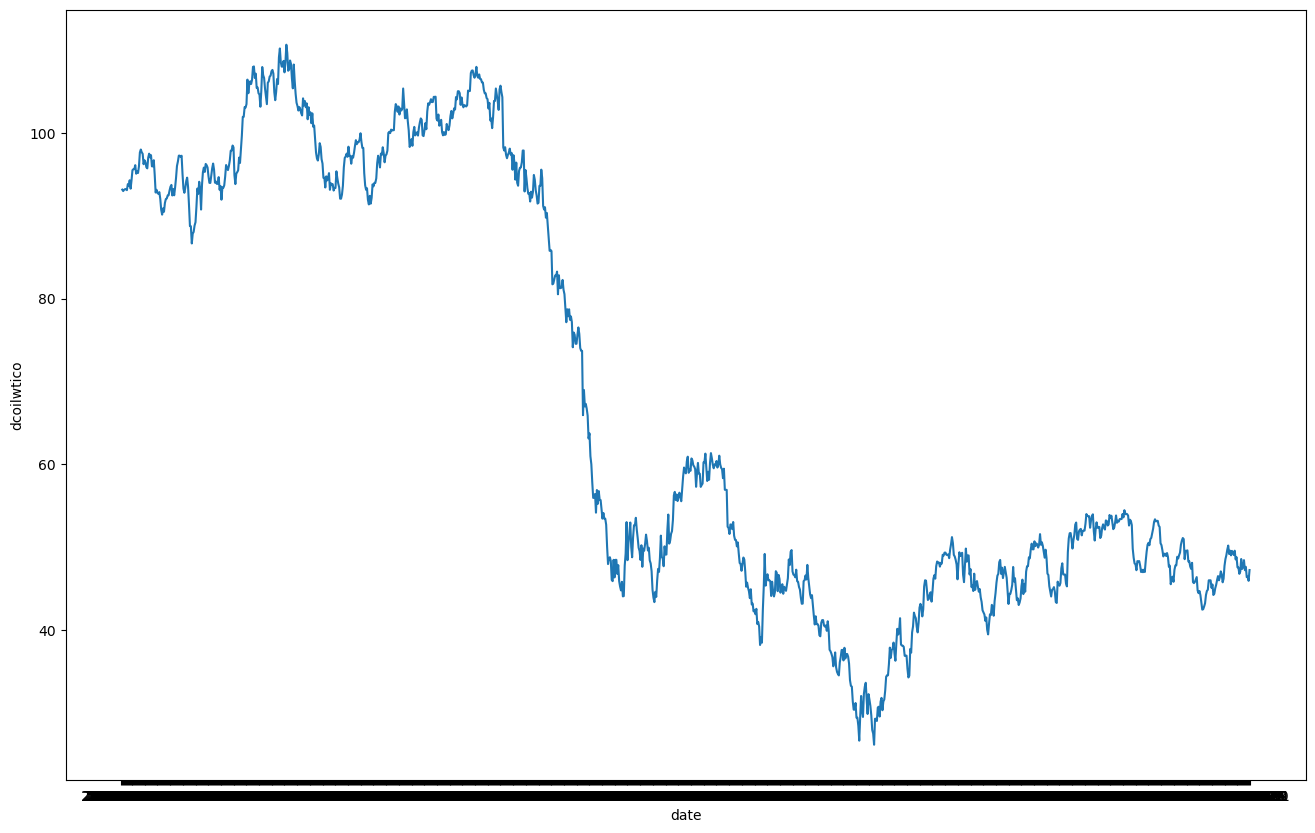

In [71]:
fig = plt.figure()
fig.set_size_inches(16,10)

oil = oil_prices.fillna(method='ffill')

sns.lineplot(data = oil,
             x = 'date', 
             y = 'dcoilwtico')

plt.show()

In [72]:
sales_by_date = data.groupby('date')['unit_sales'].sum()

In [73]:
sales_by_date = pd.DataFrame(sales_by_date)

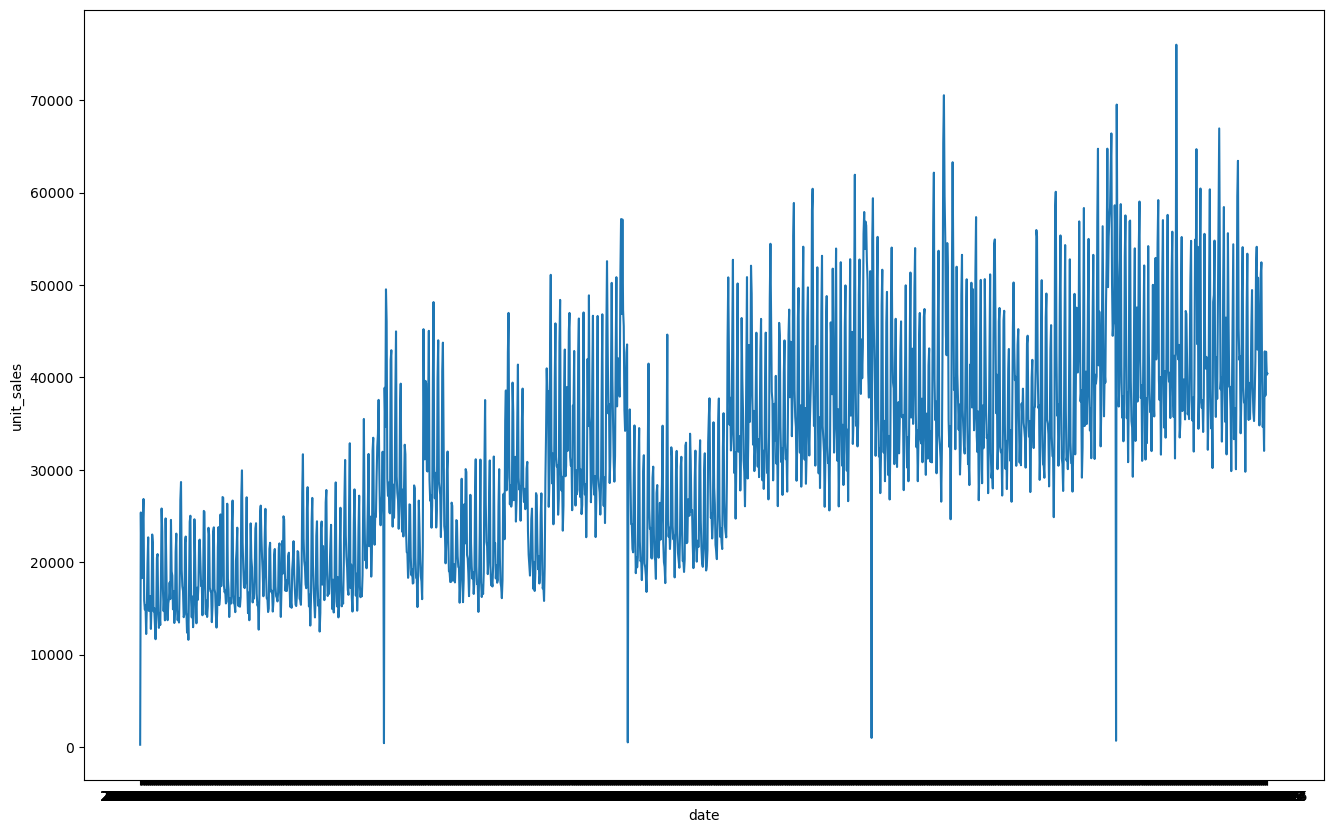

In [74]:
fig = plt.figure()
fig.set_size_inches(16,10)

sns.lineplot(data = sales_by_date,
             x = 'date', 
             y = 'unit_sales')

plt.show()

# Сформируем общую таблицу

In [75]:
data.shape

(6274852, 7)

In [76]:
df = pd.merge(data,
             oil,
             on = 'date',
             how = 'left')

min_date_price = df[~df['dcoilwtico'].isna()].iloc[0][-1]
df['dcoilwtico'] = df['dcoilwtico'].fillna(method = 'ffill')
df['dcoilwtico'] = df['dcoilwtico'].fillna(min_date_price)

df.head()

C:\Users\jackt\AppData\Local\Temp\ipykernel_5192\657348716.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  min_date_price = df[~df['dcoilwtico'].isna()].iloc[0][-1]
C:\Users\jackt\AppData\Local\Temp\ipykernel_5192\657348716.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['dcoilwtico'] = df['dcoilwtico'].fillna(method = 'ffill')


,id,date,store_nbr,item_nbr,unit_sales,onpromotion,month,dcoilwtico
0,79,2013-01-01,25,257847,90.000,NaN,1,93.14
1,480,2013-01-01,25,953609,1.000,NaN,1,93.14
2,313,2013-01-01,25,671706,2.548,NaN,1,93.14
3,497,2013-01-01,25,999545,1.000,NaN,1,93.14
4,440,2013-01-01,25,890372,1.000,NaN,1,93.14


In [77]:
df_2 = pd.merge(df,
               stores,
               on = 'store_nbr',
               how = 'left')
df_2

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,month,dcoilwtico,city,state,type,cluster
0,79,2013-01-01,25,257847,90.000,NaN,1,93.14,Salinas,Santa Elena,D,1
1,480,2013-01-01,25,953609,1.000,NaN,1,93.14,Salinas,Santa Elena,D,1
2,313,2013-01-01,25,671706,2.548,NaN,1,93.14,Salinas,Santa Elena,D,1
3,497,2013-01-01,25,999545,1.000,NaN,1,93.14,Salinas,Santa Elena,D,1
4,440,2013-01-01,25,890372,1.000,NaN,1,93.14,Salinas,Santa Elena,D,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6274847,125479005,2017-08-15,46,2026858,4.000,True,8,47.57,Quito,Pichincha,A,14
6274848,125474200,2017-08-15,45,368260,16.000,False,8,47.57,Quito,Pichincha,A,11
6274849,125430964,2017-08-15,20,1576262,1.000,False,8,47.57,Quito,Pichincha,B,6
6274850,125468522,2017-08-15,42,1346631,1.000,False,8,47.57,Cuenca,Azuay,D,2


In [78]:
df_2.isna().sum()

id                   0
date                 0
store_nbr            0
item_nbr             0
unit_sales           0
onpromotion    1082368
month                0
dcoilwtico           0
city                 0
state                0
type                 0
cluster              0
dtype: int64

In [79]:
df_3 = pd.merge(df_2,
               items,
               on = 'item_nbr',
               how = 'left')
df_3

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,month,dcoilwtico,city,state,type,cluster,family,class,perishable
0,79,2013-01-01,25,257847,90.000,NaN,1,93.14,Salinas,Santa Elena,D,1,BEVERAGES,1120,0
1,480,2013-01-01,25,953609,1.000,NaN,1,93.14,Salinas,Santa Elena,D,1,CLEANING,3046,0
2,313,2013-01-01,25,671706,2.548,NaN,1,93.14,Salinas,Santa Elena,D,1,DELI,2664,1
3,497,2013-01-01,25,999545,1.000,NaN,1,93.14,Salinas,Santa Elena,D,1,CLEANING,3026,0
4,440,2013-01-01,25,890372,1.000,NaN,1,93.14,Salinas,Santa Elena,D,1,GROCERY I,1002,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6274847,125479005,2017-08-15,46,2026858,4.000,True,8,47.57,Quito,Pichincha,A,14,GROCERY I,1034,0
6274848,125474200,2017-08-15,45,368260,16.000,False,8,47.57,Quito,Pichincha,A,11,GROCERY I,1028,0
6274849,125430964,2017-08-15,20,1576262,1.000,False,8,47.57,Quito,Pichincha,B,6,CELEBRATION,5324,0
6274850,125468522,2017-08-15,42,1346631,1.000,False,8,47.57,Cuenca,Azuay,D,2,CLEANING,3008,0


In [80]:
def replace_onpromotion(x):
    if x == True:
        return 1
    if x == False:
        return 0
    return x
    
df_3['onpromotion'] = df_3['onpromotion'].fillna('Nan')
df_3['onpromotion'] = df_3['onpromotion'].apply(replace_onpromotion).apply(str)

In [81]:
df_3.isna().sum()

id             0
date           0
store_nbr      0
item_nbr       0
unit_sales     0
onpromotion    0
month          0
dcoilwtico     0
city           0
state          0
type           0
cluster        0
family         0
class          0
perishable     0
dtype: int64

In [82]:
df_4 = pd.merge(df_3,
               holidays.rename({'type': 'holiday_type'}, axis = 1),
               on = 'date',
               how = 'left')
df_4

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,month,dcoilwtico,city,state,type,cluster,family,class,perishable,holiday_type,locale,locale_name,description,transferred
0,79,2013-01-01,25,257847,90.000,Nan,1,93.14,Salinas,Santa Elena,D,1,BEVERAGES,1120,0,Holiday,National,Ecuador,Primer dia del ano,False
1,480,2013-01-01,25,953609,1.000,Nan,1,93.14,Salinas,Santa Elena,D,1,CLEANING,3046,0,Holiday,National,Ecuador,Primer dia del ano,False
2,313,2013-01-01,25,671706,2.548,Nan,1,93.14,Salinas,Santa Elena,D,1,DELI,2664,1,Holiday,National,Ecuador,Primer dia del ano,False
3,497,2013-01-01,25,999545,1.000,Nan,1,93.14,Salinas,Santa Elena,D,1,CLEANING,3026,0,Holiday,National,Ecuador,Primer dia del ano,False
4,440,2013-01-01,25,890372,1.000,Nan,1,93.14,Salinas,Santa Elena,D,1,GROCERY I,1002,0,Holiday,National,Ecuador,Primer dia del ano,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6397780,125479005,2017-08-15,46,2026858,4.000,1,8,47.57,Quito,Pichincha,A,14,GROCERY I,1034,0,Holiday,Local,Riobamba,Fundacion de Riobamba,False
6397781,125474200,2017-08-15,45,368260,16.000,0,8,47.57,Quito,Pichincha,A,11,GROCERY I,1028,0,Holiday,Local,Riobamba,Fundacion de Riobamba,False
6397782,125430964,2017-08-15,20,1576262,1.000,0,8,47.57,Quito,Pichincha,B,6,CELEBRATION,5324,0,Holiday,Local,Riobamba,Fundacion de Riobamba,False
6397783,125468522,2017-08-15,42,1346631,1.000,0,8,47.57,Cuenca,Azuay,D,2,CLEANING,3008,0,Holiday,Local,Riobamba,Fundacion de Riobamba,False


In [83]:
df_4.isna().sum()

id                    0
date                  0
store_nbr             0
item_nbr              0
unit_sales            0
onpromotion           0
month                 0
dcoilwtico            0
city                  0
state                 0
type                  0
cluster               0
family                0
class                 0
perishable            0
holiday_type    5306754
locale          5306754
locale_name     5306754
description     5306754
transferred     5306754
dtype: int64

In [84]:
df_4['holiday_type'] = df_4['holiday_type'].fillna('WorkingDay')
df_4['locale'] = df_4['locale'].fillna('WorkingDay')
df_4['locale_name'] = df_4['locale_name'].fillna('WorkingDay')
df_4['description'] = df_4['description'].fillna('WorkingDay')
df_4['transferred'] = df_4['transferred'].fillna(False)
df_4

C:\Users\jackt\AppData\Local\Temp\ipykernel_5192\3841238437.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_4['transferred'] = df_4['transferred'].fillna(False)


,id,date,store_nbr,item_nbr,unit_sales,onpromotion,month,dcoilwtico,city,state,type,cluster,family,class,perishable,holiday_type,locale,locale_name,description,transferred
0,79,2013-01-01,25,257847,90.000,Nan,1,93.14,Salinas,Santa Elena,D,1,BEVERAGES,1120,0,Holiday,National,Ecuador,Primer dia del ano,False
1,480,2013-01-01,25,953609,1.000,Nan,1,93.14,Salinas,Santa Elena,D,1,CLEANING,3046,0,Holiday,National,Ecuador,Primer dia del ano,False
2,313,2013-01-01,25,671706,2.548,Nan,1,93.14,Salinas,Santa Elena,D,1,DELI,2664,1,Holiday,National,Ecuador,Primer dia del ano,False
3,497,2013-01-01,25,999545,1.000,Nan,1,93.14,Salinas,Santa Elena,D,1,CLEANING,3026,0,Holiday,National,Ecuador,Primer dia del ano,False
4,440,2013-01-01,25,890372,1.000,Nan,1,93.14,Salinas,Santa Elena,D,1,GROCERY I,1002,0,Holiday,National,Ecuador,Primer dia del ano,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6397780,125479005,2017-08-15,46,2026858,4.000,1,8,47.57,Quito,Pichincha,A,14,GROCERY I,1034,0,Holiday,Local,Riobamba,Fundacion de Riobamba,False
6397781,125474200,2017-08-15,45,368260,16.000,0,8,47.57,Quito,Pichincha,A,11,GROCERY I,1028,0,Holiday,Local,Riobamba,Fundacion de Riobamba,False
6397782,125430964,2017-08-15,20,1576262,1.000,0,8,47.57,Quito,Pichincha,B,6,CELEBRATION,5324,0,Holiday,Local,Riobamba,Fundacion de Riobamba,False
6397783,125468522,2017-08-15,42,1346631,1.000,0,8,47.57,Cuenca,Azuay,D,2,CLEANING,3008,0,Holiday,Local,Riobamba,Fundacion de Riobamba,False


In [85]:
df_4.isna().sum()

id              0
date            0
store_nbr       0
item_nbr        0
unit_sales      0
onpromotion     0
month           0
dcoilwtico      0
city            0
state           0
type            0
cluster         0
family          0
class           0
perishable      0
holiday_type    0
locale          0
locale_name     0
description     0
transferred     0
dtype: int64

# Преобразуем данные

In [86]:
df_4 = df_4[df_4['unit_sales']>0]

In [87]:
X = df_4.drop(['unit_sales'], axis = 1)
y = df_4['unit_sales']

In [88]:
y = y.apply(np.log1p)

In [89]:
X_train, X_test = X[X['date'] < '2017-06-01'], X[X['date'] >= '2017-06-01']
y_train, y_test = y[y.index.isin(X_train.index)], y[y.index.isin(X_test.index)]

In [90]:
X_train = X_train.drop('date', axis = 1)
X_test = X_test.drop('date', axis = 1)
X = X.drop('date', axis = 1)

In [91]:
object_cols = ['store_nbr', 'item_nbr', 'onpromotion', 'month',
               'city', 'state', 'type', 'cluster', 'family',
               'class', 'perishable', 'holiday_type', 'locale',
               'locale_name', 'description', 'transferred']

X.head()

,id,store_nbr,item_nbr,onpromotion,month,dcoilwtico,city,state,type,cluster,family,class,perishable,holiday_type,locale,locale_name,description,transferred
0,79,25,257847,Nan,1,93.14,Salinas,Santa Elena,D,1,BEVERAGES,1120,0,Holiday,National,Ecuador,Primer dia del ano,False
1,480,25,953609,Nan,1,93.14,Salinas,Santa Elena,D,1,CLEANING,3046,0,Holiday,National,Ecuador,Primer dia del ano,False
2,313,25,671706,Nan,1,93.14,Salinas,Santa Elena,D,1,DELI,2664,1,Holiday,National,Ecuador,Primer dia del ano,False
3,497,25,999545,Nan,1,93.14,Salinas,Santa Elena,D,1,CLEANING,3026,0,Holiday,National,Ecuador,Primer dia del ano,False
4,440,25,890372,Nan,1,93.14,Salinas,Santa Elena,D,1,GROCERY I,1002,0,Holiday,National,Ecuador,Primer dia del ano,False


In [92]:
X_train[object_cols] = X_train[object_cols].astype(object)
X_test[object_cols] = X_test[object_cols].astype(object)
X[object_cols] = X[object_cols].astype(object)

In [123]:
from sklearn.base import BaseEstimator, TransformerMixin
import itertools

class CustomFunctionTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self,
                 object_columns=[],
                 target_name='unit_sales'):
        
        self.object_columns = object_columns
        self.target_name = target_name
        
                
    def fit(self,
            X,
            y):
        
        X_fit = X.copy()
        y_fit = y.copy()
        
        self.numeric_columns = [x for x in X_fit.columns if x not in self.object_columns]
        
        X_with_target = pd.concat((X_fit, y_fit), axis=1)
        
        ### Сгенерим колонки к которым применим One-Hot-Encoding
        self.cols_for_ohe = [col for col in self.object_columns
                             if 
                             X_with_target[col].nunique() <= 10]
        
        ### Запомним все ohe колонки и их названия!
        self.ohe_names = {col : sorted([f"{col}_{value}" for value in X_with_target[col].unique()])
                          for col in self.cols_for_ohe}
        
        
        ### Сгенерим колонки к которым применим Mean-Target-Encoding
        self.cols_for_mte = [col for col in self.object_columns
                             if X_with_target[col].nunique() > 10]
        
        ### Посчитаем на валидации средние значения таргета
        self.dict_of_means = {col : X_with_target.groupby(col)[self.target_name].mean()
                              for col in self.cols_for_mte}
        
        
        return self
    
    def transform(self,
                  X,
                  y=None):
        
        X_ = X.copy()
        
        
        data_part = pd.get_dummies(X_[self.cols_for_ohe],
                                   prefix=self.cols_for_ohe)
        
        data_part_cols = data_part.columns
        
        X_ = X_.drop(self.cols_for_ohe, axis=1)
        X_ = pd.concat((X_, data_part), axis=1)
        
    
        for col in self.cols_for_mte:
                X_[col] = X_[col].map(self.dict_of_means[col])
                
                mean_value = self.dict_of_means[col].values.mean()
                
                X_[col] = X_[col].fillna(mean_value)
                
            
            
        all_ohe = list(itertools.chain(*list(self.ohe_names.values())))
        
        missing_columns = [x 
                           for x in all_ohe
                           if x not in X_.columns
                           and
                           x not in self.numeric_columns]

        extra_columns = [x
                         for x in data_part_cols
                         if x not in all_ohe]
        
        ### Новые категории необходимо убрать
        X_ = X_.drop(extra_columns, axis=1)
    
        ### Отсутствующие категории (бинарные колонки)
        ### необходимо добавить: заполним их просто нулями
        
        if len(missing_columns) != 0:

            zeros = np.zeros((X_.shape[0], len(missing_columns)))
            zeros = pd.DataFrame(zeros,
                                 columns=missing_columns,
                                 index=X_.index)

            X_ = pd.concat((X_, zeros), axis=1)
            
        return X_[sorted(X_.columns)]

In [124]:
# Проверка
transformer = CustomFunctionTransformer(object_columns = object_cols)
transformer.fit(X_train, y_train)

CustomFunctionTransformer(object_columns=['store_nbr', 'item_nbr',
                                          'onpromotion', 'month', 'city',
                                          'state', 'type', 'cluster', 'family',
                                          'class', 'perishable', 'holiday_type',
                                          'locale', 'locale_name',
                                          'description', 'transferred'])

In [125]:
check_train = transformer.transform(X_train)
check_test = transformer.transform(X_test)

In [126]:
check_train

,city,class,cluster,dcoilwtico,description,family,holiday_type_Additional,holiday_type_Bridge,holiday_type_Event,holiday_type_Holiday,...,perishable_1,state,store_nbr,transferred_False,transferred_True,type_A,type_B,type_C,type_D,type_E
0,1.470042,2.213575,1.670262,93.14,1.602792,1.950299,False,False,False,True,...,False,1.470042,1.470042,True,False,False,False,False,True,False
1,1.470042,1.549459,1.670262,93.14,1.602792,1.575496,False,False,False,True,...,False,1.470042,1.470042,True,False,False,False,False,True,False
2,1.470042,1.162491,1.670262,93.14,1.602792,1.585522,False,False,False,True,...,True,1.470042,1.470042,True,False,False,False,False,True,False
3,1.470042,1.807048,1.670262,93.14,1.602792,1.575496,False,False,False,True,...,False,1.470042,1.470042,True,False,False,False,False,True,False
4,1.470042,1.338276,1.670262,93.14,1.602792,1.710138,False,False,False,True,...,False,1.470042,1.470042,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5980888,1.929557,2.051363,1.799537,48.29,1.750490,1.950299,False,False,False,False,...,False,1.927277,1.799537,True,False,False,False,True,False,False
5980889,1.671871,1.873412,1.604993,48.29,1.750490,1.710138,False,False,False,False,...,False,1.671871,1.671871,True,False,False,False,False,True,False
5980890,1.661150,1.972361,1.643954,48.29,1.750490,1.710138,False,False,False,False,...,False,1.661150,1.561470,True,False,False,False,False,True,False
5980891,1.929557,1.606088,2.044380,48.29,1.750490,1.950299,False,False,False,False,...,False,1.927277,2.227848,True,False,True,False,False,False,False


In [127]:
check_test

,city,class,cluster,dcoilwtico,description,family,holiday_type_Additional,holiday_type_Bridge,holiday_type_Event,holiday_type_Holiday,...,perishable_1,state,store_nbr,transferred_False,transferred_True,type_A,type_B,type_C,type_D,type_E
5980893,1.929557,1.893738,1.755433,48.32,1.750490,1.761502,False,0.0,0.0,False,...,True,1.927277,1.697383,True,False,False,True,False,False,False
5980894,1.607719,1.518565,1.551288,48.32,1.750490,1.950299,False,0.0,0.0,False,...,False,1.607719,1.607719,True,False,False,False,True,False,False
5980895,1.929557,1.564698,1.966649,48.32,1.750490,1.761502,False,0.0,0.0,False,...,True,1.927277,1.874880,True,False,False,False,False,True,False
5980896,1.374465,2.070567,1.526522,48.32,1.750490,2.276875,False,0.0,0.0,False,...,True,1.374465,1.374465,True,False,False,False,True,False,False
5980897,1.929557,1.625461,1.658640,48.32,1.750490,1.710138,False,0.0,0.0,False,...,False,1.927277,1.519988,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6397780,1.929557,1.569078,2.044380,47.57,1.749309,1.710138,False,0.0,0.0,True,...,False,1.927277,2.073149,True,False,True,False,False,False,False
6397781,1.929557,1.508487,2.172999,47.57,1.749309,1.710138,False,0.0,0.0,True,...,False,1.927277,2.265844,True,False,True,False,False,False,False
6397782,1.929557,0.992645,1.755433,47.57,1.749309,1.007815,False,0.0,0.0,True,...,False,1.927277,1.697383,True,False,False,True,False,False,False
6397783,1.661150,1.740134,1.643954,47.57,1.749309,1.575496,False,0.0,0.0,True,...,False,1.661150,1.561470,True,False,False,False,False,True,False


In [128]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
pipe = Pipeline([('custom_transformer', CustomFunctionTransformer(object_columns = object_cols,
                                                                 target_name = 'unit_sales')),
                ('decision_tree', DecisionTreeRegressor())])
pipe.fit(X_train, y_train)

Pipeline(steps=[('custom_transformer',
                 CustomFunctionTransformer(object_columns=['store_nbr',
                                                           'item_nbr',
                                                           'onpromotion',
                                                           'month', 'city',
                                                           'state', 'type',
                                                           'cluster', 'family',
                                                           'class',
                                                           'perishable',
                                                           'holiday_type',
                                                           'locale',
                                                           'locale_name',
                                                           'description',
                                                           'transferred'])),
                ('decision_tree', DecisionTreeRegressor())])

In [129]:
train_preds = pipe.predict(X_train)
test_preds = pipe.predict(X_test)

train_error = np.mean((train_preds - y_train)**2)
test_error = np.mean((test_preds - y_test)**2)

print(f'Ошибка на тренировночной выборке: {train_error.round(3)}')
print(f'Ошибка на тестовой выборке: {train_error.round(3)}')

Ошибка на тренировночной выборке: 0.0
Ошибка на тестовой выборке: 0.0


In [122]:
pipe.get_params()

{'memory': None,
 'steps': [('custom_transformer',
   CustomFunctionTransformer(object_columns=['store_nbr', 'item_nbr',
                                             'onpromotion', 'month', 'city',
                                             'state', 'type', 'cluster', 'family',
                                             'class', 'perishable', 'holiday_type',
                                             'locale', 'locale_name',
                                             'description', 'transferred'])),
  ('decision_tree', DecisionTreeRegressor())],
 'transform_input': None,
 'verbose': False,
 'custom_transformer': CustomFunctionTransformer(object_columns=['store_nbr', 'item_nbr',
                                           'onpromotion', 'month', 'city',
                                           'state', 'type', 'cluster', 'family',
                                           'class', 'perishable', 'holiday_type',
                                           'locale', 'locale_name',

In [130]:
from sklearn.model_selection import TimeSeriesSplit
splitter = TimeSeriesSplit(n_splits = 3)
from sklearn.model_selection import GridSearchCV
param_grid = {
    'decision_tree__max_depth': [3, 5, 10],
    'decision_tree__max_leaf_nodes': [100, 1000],
    'decision_tree__min_impurity_decrease': [0, 0.1],
    'decision_tree__min_samples_split': [10, 200, 50000],
}

search = GridSearchCV(pipe, param_grid,
                     cv = splitter,
                     scoring = 'neg_mean_squared_error',
                     verbose = 10)
search.fit(X_train, y_train)
print(f'Best score is {search.best_score_:.5f}')
print(f'Best params: {search.best_params_}')
print(f'Качество лучшей модели на финальном тесте равно {search.score(X_test.y_test)}')

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV 1/3; 1/36] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10


Exception ignored in: 'zmq.backend.cython._zmq.Frame.__del__'
Traceback (most recent call last):
  File "_zmq.py", line 160, in zmq.backend.cython._zmq._check_rc
KeyboardInterrupt: 

KeyboardInterrupt

